In [1]:
"""Install anaconda and customise python """
#wget http://fagent.wikidot.com/local--files/python/mps_workshop_Mon.ipynb
#https://www.anaconda.com/distribution/
#wget https://repo.anaconda.com/archive/Anaconda3-2019.10-Linux-x86_64.sh
#wget https://repo.anaconda.com/archive/Anaconda2-2019.10-Linux-x86_64.sh
#sh Anaconda3-2019.10-Linux-x86_64.sh

#also try conda create --name python=3.7
"""options to run: python, ipython, jupyter-notebook, etc., and command line, batch script submission"""

#differences with IDL - open source, optional modules need to be loaded, functions in modules, format

#It can be convenient to include a pythonstart file, which will load some default modules of your choice
#when launching python, ipython and jupyter-notebook, but not batch or command line scripts.
#If python path aleady contains Pencil Code, then only the last two following lines need be included
#in your .bashrc file.
"""
PENCIL_HOME=$HOME/codes/pencil-code
export PENCIL_HOME
export PATH=+$PATH:${PENCIL_HOME}/bin:+${PENCIL_HOME}/utils:+${PENCIL_HOME}/axel:${PENCIL_HOME}/{bin,utils{,/axel},remesh/bin}
if [ -z $PYTHONPATH ]; then
    PYTHONPATH="$PENCIL_HOME/python"
else
    PYTHONPATH="$PYTHONPATH:$PENCIL_HOME/python"
fi
export PYTHONSTARTUP=$HOME/pythonstart
export PYTHONPATH="$PYTHONPATH:$PYTHONSTARTUP"
"""
%pwd

'/homeappl/home/fagent/codes/pencil-code/python/tutorials/mps'

In [2]:
#Replace these directory paths with paths accessible to yourself with pencil simulations and data.
import pencil as pc

%cd 

/homeappl/home/fagent


In [3]:
#Alternative navigation to shell command line tools, python command line calls can be included in scripts
#to be executed from the command line or batch file
import os
PC_HOME = os.getenv("PENCIL_HOME")
os.chdir(PC_HOME+'/python/tutorials')
dir1=os.getcwd()
os.chdir(os.path.join(dir1,'mps/ism'))
dir2=os.getcwd()
dir1,dir2


('/homeappl/home/fagent/codes/pencil-code/python/tutorials',
 '/homeappl/home/fagent/codes/pencil-code/python/tutorials/mps/ism')

data/        print.in  run.in  start.in  work.vtk
init_ism.in  README    src/    video.in  xyaver.in
Read 288 lines.
dict_keys(['t', 'keys', 'it', 'dt', 'urms', 'orms', 'umax', 'omax', 'oum', 'uxm', 'uym', 'uzm', 'ux2m', 'uy2m', 'uz2m', 'Marms', 'Mamax', 'rhom', 'rhomin', 'rhomax', 'ugrhom', 'ekin', 'ethm', 'TTm', 'TTmin', 'TTmax', 'gTmax', 'shockmax', 'taucmin', 'tauhmin', 'taufmin', 'Hmax', 'Hmax_ism', 'fviscmin', 'fviscmax', 'meshRemax', 'dtu', 'dtnu', 'dtchi', 'dtHr', 'dtFr', 'dtb', 'dteta', 'brms', 'jrms', 'bmax', 'jmax', 'bxm', 'bym', 'bzm', 'betamin', 'betamax', 'vArms', 'vAmax', 'ab_int', 'jb_int'])


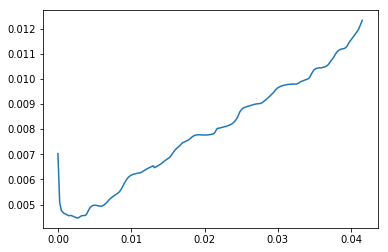

In [4]:
#reading and plotting time series objects, also read parameters files data/param.nml and data/param2.nml
import matplotlib.pyplot as plt
%ls
ts = pc.read.ts()
pars=pc.read.param(quiet=True)
parr = pc.read.param(quiet=True,param2=True)
print(ts.__dict__.keys())
plt.plot(ts.t,ts.brms)
#if plot does not display try:
plt.show()

In [5]:
#To keep plots open in ipython plt.ion()

<Figure size 432x288 with 0 Axes>

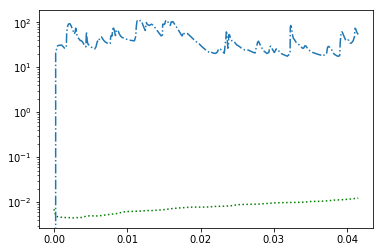

<Figure size 432x288 with 0 Axes>

In [6]:
#Also available semilogy, semilogx and loglog
plt.semilogy(ts.t,ts.brms,'g:')
plt.semilogy(ts.t,ts.urms,'-.')
plt.figure()



Text(0.5, 0, '$t$ [kpc]')

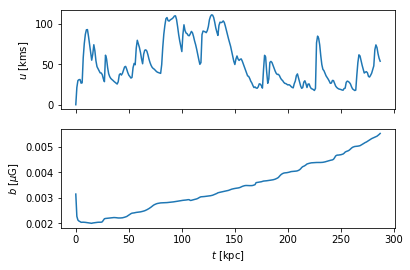

In [7]:
# various option for subplot or subplots permit combining plots
fig, ax = plt.subplots(2, sharex=True)
ax[0].plot(ts.urms)
ax[1].plot(ts.brms*pars.unit_magnetic*1e6)
ax[0].set_ylabel(r'$u$ [kms]')
ax[1].set_ylabel(r'$b$ [$\mu$G]')
ax[1].set_xlabel(r'$t$ [kpc]')

In [8]:
#read f-array and associated files
var = pc.read.var(magic=['bb','tt','pp'],trimall=True)
indx= pc.read.index()

In [9]:
print(var.__dict__.keys())
print(indx.__dict__.keys())

dict_keys(['t', 'dx', 'dy', 'dz', 'x', 'y', 'z', 'f', 'l1', 'l2', 'm1', 'm2', 'n1', 'n2', 'magic', 'bb', 'shock', 'uu', 'ux', 'uy', 'uz', 'rho', 'ss', 'aa', 'ax', 'ay', 'az', 'netheat', 'cooling', 'deltay', 'tt', 'pp'])
dict_keys(['keys', 'shock', 'uu', 'ux', 'uy', 'uz', 'rho', 'ss', 'aa', 'ax', 'ay', 'az', 'netheat', 'cooling'])


In [10]:
"""
arrays: tuples (), lists [], dictionaries {}, numpy arrays ()
"""
magic = []
print(magic)

magic.append('bb')
print(magic)

magic.append((2,'tt'))
print(magic, magic[1][0])



[]
['bb']
['bb', (2, 'tt')] 2


In [11]:
stuff = (21, ['bb', 12, 1e23], 'Fred')
stuff[0],stuff[1]

(21, ['bb', 12, 1e+23])

In [12]:
type(ts),type(ts.t)

(pencil.read.ts.TimeSeries, numpy.ndarray)

In [13]:
#CAUTION '=' creates new pointer not an independent copy
a=ts.t[:10].copy();print(a)
b=a;b*=10
a,b


[0.        0.0002396 0.0004785 0.0007844 0.001063  0.0014422 0.0016863
 0.001746  0.0018217 0.0019222]


(array([0.      , 0.002396, 0.004785, 0.007844, 0.01063 , 0.014422,
        0.016863, 0.01746 , 0.018217, 0.019222]),
 array([0.      , 0.002396, 0.004785, 0.007844, 0.01063 , 0.014422,
        0.016863, 0.01746 , 0.018217, 0.019222]))

In [14]:
a=ts.t[:10].copy();print(a)
b=a.copy();b*=10
a,b


[0.        0.0002396 0.0004785 0.0007844 0.001063  0.0014422 0.0016863
 0.001746  0.0018217 0.0019222]


(array([0.       , 0.0002396, 0.0004785, 0.0007844, 0.001063 , 0.0014422,
        0.0016863, 0.001746 , 0.0018217, 0.0019222]),
 array([0.      , 0.002396, 0.004785, 0.007844, 0.01063 , 0.014422,
        0.016863, 0.01746 , 0.018217, 0.019222]))

In [15]:
import numpy as np
index1=np.arange(10)
index2=np.arange(1,10)
index3=np.arange(1,10,2)
index1,index2,index3


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([1, 3, 5, 7, 9]))

In [16]:
t0=np.zeros_like(ts.t)
t1=np.ones_like(ts.t)
n0=np.zeros([5,10])
nn=np.empty([50,5])
t0,t1,n0


(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

In [17]:
t0.shape,t1.shape,n0.shape,nn.shape[0], nn.size



((288,), (288,), (5, 10), 50, 250)

In [18]:
#example of a dictionary
for key in indx.__dict__.keys():
    print(key,indx.__getattribute__(key))

keys []
shock 9
uu 1
ux 1
uy 2
uz 3
rho 4
ss 5
aa 6
ax 6
ay 7
az 8
netheat 10
cooling 12


In [19]:
#Read averages object by default ['xy','xz','yz'], 
#but for small enough 2D arrays inlucde in plane_list=['y','z']
av=pc.read.aver()


data/averages/xy.h5


In [20]:
av.__dict__.keys(),av.xy.__dict__.keys()

(dict_keys(['t', 'xy']),
 dict_keys(['rhomz', 'ugrhomz', 'TTmz', 'uxTTmz', 'uyTTmz', 'uzTTmz', 'ppmz', 'ssmz', 'oumz', 'Remz', 'uxmz', 'uymz', 'uzmz', 'ux2mz', 'uy2mz', 'uz2mz', 'oxmz', 'oymz', 'ozmz', 'ox2mz', 'oy2mz', 'oz2mz', 'divumz', 'divu2mz', 'ekinmz', 'ruxmz', 'ruymz', 'ruzmz', 'rux2mz', 'ruy2mz', 'ruz2mz', 'ruxuzmz', 'ruxuymz', 'ruyuzmz', 'ruxuz2mz', 'ruxuy2mz', 'ruyuz2mz', 'gTxgsxmz', 'gTxgsymz', 'gTxgszmz', 'gTxgsx2mz', 'gTxgsy2mz', 'gTxgsz2mz', 'oguxmz', 'oguymz', 'oguzmz', 'ogux2mz', 'oguy2mz', 'oguz2mz', 'oxdivumz', 'oydivumz', 'ozdivumz', 'oxdivu2mz', 'oydivu2mz', 'ozdivu2mz', 'bxmz', 'bymz', 'bzmz', 'jxmz', 'jymz', 'jzmz', 'Exmz', 'Eymz', 'Ezmz', 'jbmz', 'abmz', 'ubmz', 'uamz', 'uxbxmz', 'uybxmz', 'uzbxmz', 'uxbymz', 'uybymz', 'uzbymz', 'uxbzmz', 'uybzmz', 'uzbzmz', 'examz1', 'examz2', 'examz3', 'poynzmz']))

In [21]:
#Read vidio slices.
#For fortran binaries first use shell command $ src/read_all_videofiles.x, not necessary for hdf5.
vslice = pc.read.slices()


In [22]:
vslice.__dict__.keys(),vslice.xy.__dict__.keys()

(dict_keys(['t', 'xy2', 'yz', 'xz', 'xy']),
 dict_keys(['lnTT', 'uu3', 'rho', 'bb1']))

In [23]:
var.f.shape

(12, 300, 64, 64)

Text(0, 0.5, '$u_x$ [km s$^{-1}$]')

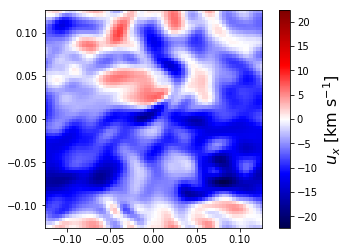

In [24]:
#2D slices can be plotted with imshow, contour, contourf and pcolormesh.
#Default color normalisation is linear.
from matplotlib import colors
from matplotlib import cm
fslice = var.uu[0,20]
fmin,fmax = fslice.min(),fslice.max()
plt.imshow(fslice,
           #norm=colors.LogNorm(),
           extent=[var.x.min(),var.x.max(),var.y.min(),var.y.max()], #apply physical grid dimensions
           vmin=-max(-fmin,fmax),vmax=max(-fmin,fmax), #use to center the colors about 0
           cmap=cm.seismic #diverging color tables for vectors
           #reference: https://matplotlib.org/examples/color/colormaps_reference.html
          )
cbar=plt.colorbar()
cbar.ax.set_ylabel(r'$u_x$ [km s$^{-1}$]',fontsize=16) #label the colorbar

Text(0, 0.5, '$h$ [kpc]')

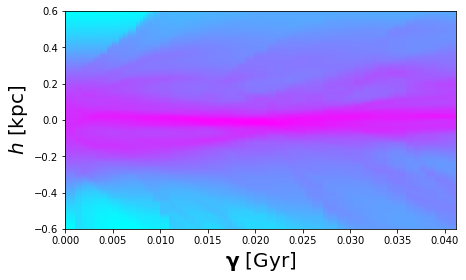

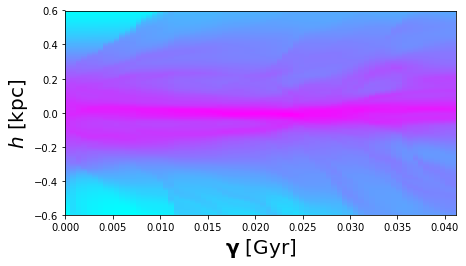

In [25]:
#compare imshow/pcolormesh for non-equidistant grid or non-Cartesian
fslice = av.xy.rhomz
math,vmax = fslice.min(),fslice.max()
tz = np.meshgrid(av.t,var.z) #construct a 2D mesh for each coordinate
plt.figure(figsize=[7,4])
plt.pcolormesh(tz[0],tz[1],fslice.T,
           norm=colors.LogNorm(), #log normalization of the colour scales
           #vmin=-max(-fmin,fmax),vmax=max(-fmin,fmax),
           cmap=cm.cool #sequential color maps for scalar variables
              )
plt.xlabel(r'${\bf{\gamma}}$ [Gyr]',fontsize=20)
plt.ylabel(r'$h$ [kpc]',fontsize=20)
#cbar=plt.colorbar()
plt.figure(figsize=[7,4])
plt.imshow(fslice.T,
           norm=colors.LogNorm(),
           extent=[av.t.min(),av.t.max(),var.z.min(),var.z.max()],
           #vmin=-max(-fmin,fmax),vmax=max(-fmin,fmax),
           cmap=cm.cool, aspect=0.018, #adjust the aspect ratio of the data
           origin=True #sets indices 0,0 in bottom left corner
          )
plt.xlabel(r'${\bf{\gamma}}$ [Gyr]',fontsize=20)
plt.ylabel(r'$h$ [kpc]',fontsize=20)

#cbar=plt.colorbar()

In [26]:
vtk=pc.export.var2vtk('var.h5') #default is 'var.dat'

Writing shock.
Writing uu.
Writing ux.
Writing uy.
Writing uz.
Writing rho.
Writing ss.
Writing aa.
Writing ax.
Writing ay.
Writing az.
Writing netheat.
Writing cooling.
Writing vort.
Writing tt.
Writing pp.
Writing bb.
Writing jj.
Writing ab.
Writing b_mag.
Writing j_mag.
